# ATMS 511 Radation Lab: Scattering by non-spherical particles, a hands on investigation of T-matrix calculations using the pytmatrix module 

Today we will be investigating the pytmatrix package made by Jussi Leinonen at JPL, translated from FORTRAN (NASA GISS, http://www.giss.nasa.gov/staff/mmishchenko/t_matrix.html) to PYTHON. <br/>

## Goals: 

The goals of this experiment are to <br/>

1) Understand the effect of non-sphericity on the scattering parameters<br/>
2) Familiarize you with computational coding in python (in the cloud) <br/>

## First thing first, lets install pytmatrix and miepython

In this cloud version of python we need to install packages since every time you start is a fresh, clean version of python

In [1]:
!pip install pytmatrix
!pip install miepython

  Running setup.py bdist_wheel for miepython ... - done
  Stored in directory: /content/.cache/pip/wheels/72/97/dc/de60d5fd12e1cda6e76fd4d394c9e549359255fb5bc11b2b1f
Successfully built miepython


## Great! 

Let's test the pytmatrix code

In [2]:
from pytmatrix.test import test_tmatrix
test_tmatrix.run_tests()

test_adaptive_orient (pytmatrix.test.test_tmatrix.TMatrixTests)
Test an adaptive orientation averaging case ... ok
test_against_mie (pytmatrix.test.test_tmatrix.TMatrixTests)
Test scattering parameters against Mie results ... ok
test_asymmetry (pytmatrix.test.test_tmatrix.TMatrixTests)
Test calculation of the asymmetry parameter ... ok
test_fixed_orient (pytmatrix.test.test_tmatrix.TMatrixTests)
Test a fixed-point orientation averaging case ... ok
test_integrated_x_sca (pytmatrix.test.test_tmatrix.TMatrixTests)
Test Rayleigh scattering cross section integrated over sizes. ... ok
test_optical_theorem (pytmatrix.test.test_tmatrix.TMatrixTests)
Optical theorem: test that for a lossless particle, Csca=Cext ... ok
test_psd (pytmatrix.test.test_tmatrix.TMatrixTests)
Test a case that integrates over a particle size distribution ... ok
test_radar (pytmatrix.test.test_tmatrix.TMatrixTests)
Test that the radar properties are computed correctly ... ok
test_rayleigh (pytmatrix.test.test_tmatrix.TM

In [0]:
#T-matrix codes
from pytmatrix import tmatrix
from pytmatrix import scatter
import pytmatrix
#Mie codes 
import miepython as mp
import numpy as np
#plotting package
%matplotlib inline
import matplotlib.pyplot as plt



# Question 1: What is the difference between T-matrix and Mie theory?

---




## Please type the answer below:

Mie theory is explicitly for spheres, t-matrix allows us to consider non-spherical but rotationally symmetric shapes

## What can pytmatrix supply us with?

1) Asymetry parameter <br />
2) Phase function <br/>
3) Extinction Cross section <br/>
4) Scattering Cross section <br/>
5) Single Scatter Albedo <br/>
6) And microwave parameters (radar focused, thus backscatter focused) 

# Question 2: What is the scatter cross-section ($\sigma_s$) in plain english? 

---



## Please type the answer below:

the scatter cross section represents the amount of incident energy that is removed from the original direction because of a single scattering event 


# Question 3: Plot the scatter cross-section of a aerosol particle and visable light with the following attributes using the t-matrix solution. 

---



This first example will be given with many comments to help you learn how to use the package. After that we will formulate it one our own/together <br/>

Assumptions: <br/>
1 spherical aerosol particle <br/>
m = 1.53 + 0.008i  <br/>
r = [0.01 to 1] microns <br/>
$\lambda$ = 0.443 microns 


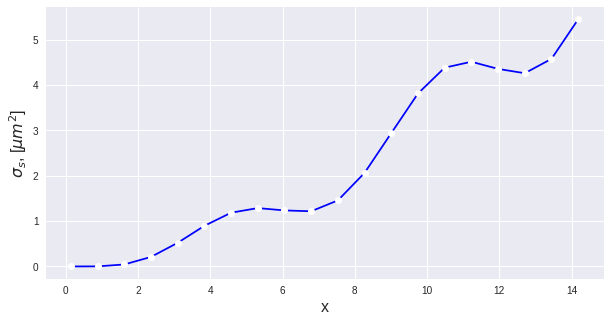

In [5]:
#Step 1: code prescribed assumptions for the aerosol particle
r = np.linspace(0.01,1,20) #radii, microns
m = complex(1.53,0.008) #index of refraction 
lambdaa = 0.443 #wavelength, microns
x = 2*np.pi*r/lambdaa #size parameter

#Step 2: pre-allocate array to hold scatter objects
scat_obs = np.zeros(len(r),dtype=object)

#Step 3: loop across radii
for i in np.arange(0,len(r)):
    #this is the format to create the scatter object. From the object we can calulate a whole list of scattering parameters
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_SPHEROID,axis_ratio=1)
    #We will set the radius as the maximum radius to emulate the sphere
    t.radius_type = t.RADIUS_MAXIMUM
    #store object
    scat_obs[i] = t

#Step 4: pre-allocate array to hold scatter cross-sections
sigma_s = np.zeros(len(r))
sigma_e = np.zeros(len(r))
#Step 5: loop across radii
for i in np.arange(0,len(r)):
    #to calculate all parameters we will use this syntax
    sigma_s[i] = pytmatrix.scatter.sca_xsect(scat_obs[i])
    sigma_e[i] = pytmatrix.scatter.ext_xsect(scat_obs[i])


#plot it up
fig =plt.figure(figsize=(10,5))
ax = plt.gca()
ax.plot(x,sigma_s,'-ob',markerfacecolor='w')
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'$\sigma_{s}$, [$\mu m^{2}$]',fontsize=16)
ax.grid('on')

# Question 4: Compare the solution you got from T-matrix to the solution from the MIE code we used last week 

---



Again here I will guide you through how to run miepython, but later on we will code it in real time

In [0]:
#Note: all the varibles were set in running the code for pytmatrix. We will just reuse them with the exception of the refractive index, m 

#m in the mie code is defined as a m = (real - imaginary)

m = complex(1.53,-0.008)

#The mie code returns all of the efficiencies: 
qext, qsca, qback, g = mp.mie(m,x)

## Q4a: What's the relationship between the efficiencies and the cross-sections?

---



Q = sigma times geometric cross section

## Q4b: What do you expect  to see when you plot both solutions?

---




Enter text here: Double click me

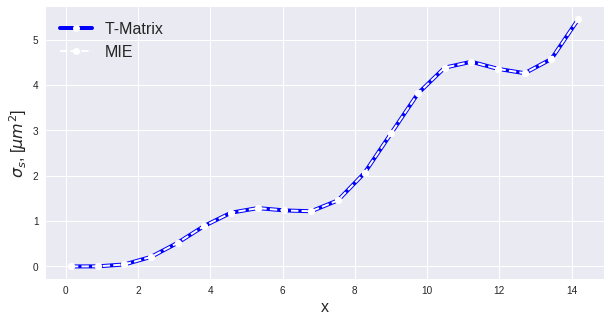

In [7]:
### FOR INSTRUCTOR
absorb  = (qext - qsca) * np.pi * r**2
scatt   = qsca * np.pi * r**2
extinct = qext* np.pi * r**2
###

#plot both
fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s,'-ob',markerfacecolor='w',lw=4,label='T-Matrix')
plt.plot(x,scatt,'--ow',markerfacecolor='w',lw=2,label='MIE')
ax = plt.gca()
ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'$\sigma_{s}$, [$\mu m^{2}$]',fontsize=16)
plt.show()

# Question 5: Plot all three (scattering, absorption and extinction) cross sections on one axis (using both mie and t-matrix).

---



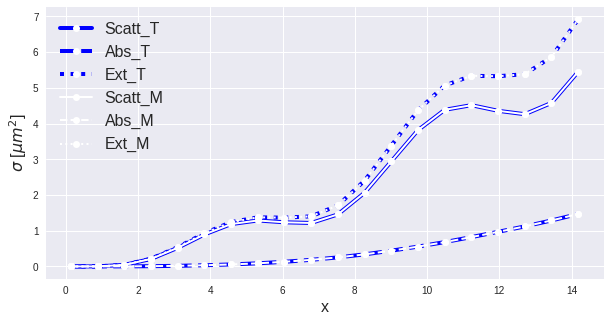

In [8]:
### FOR INSTRUCTOR
absorb  = (qext - qsca) * np.pi * r**2
extinct = qext* np.pi * r**2

# Set m back to positve imaginary comp.
m = complex(1.53,0.008)

#loop across radii
for i in np.arange(0,len(r)):
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_SPHEROID,axis_ratio=1)
    #We will set the radius as the maximum radius to emulate the sphere
    t.radius_type = t.RADIUS_MAXIMUM
    #store object
    scat_obs[i] = t

#Step 4: pre-allocate array to hold scatter cross-sections
sigma_a = np.zeros(len(r))
sigma_e = np.zeros(len(r))
#Step 5: loop across radii: The reason for the two loops is so we can just do this second loop later on
for i in np.arange(0,len(r)):
    #to calculate all parameters we will use this syntax
    sigma_e[i] = pytmatrix.scatter.ext_xsect(scat_obs[i])
    sigma_a[i] = sigma_e[i] - sigma_s[i]

#plot both
fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s,'-ob',markerfacecolor='w',lw=4,label='Scatt_T')
plt.plot(x,sigma_a,'--ob',markerfacecolor='w',lw=4,label='Abs_T')
plt.plot(x,sigma_e,':ob',markerfacecolor='w',lw=4,label='Ext_T')
plt.plot(x,scatt,'-ow',markerfacecolor='w',lw=2,label='Scatt_M')
plt.plot(x,absorb,'--ow',markerfacecolor='w',lw=2,label='Abs_M')
plt.plot(x,extinct,':ow',markerfacecolor='w',lw=2,label='Ext_M')
ax = plt.gca()
ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'$\sigma$ [$\mu m^{2}$]',fontsize=16)

plt.show()

# Question 6: Plot the mie and t-matrix solutions to the Q's

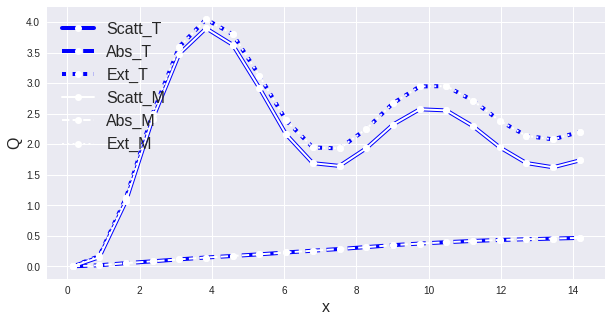

In [9]:
qext_t = sigma_e/(np.pi*r**2)
qsca_t = sigma_s/(np.pi*r**2)
qabs_t = sigma_a/(np.pi*r**2)


#plot both
fig =plt.figure(figsize=(10,5))

plt.plot(x,qsca_t,'-ob',markerfacecolor='w',lw=4,label='Scatt_T')
plt.plot(x,qabs_t,'--ob',markerfacecolor='w',lw=4,label='Abs_T')
plt.plot(x,qext_t,':ob',markerfacecolor='w',lw=4,label='Ext_T')
plt.plot(x,qsca,'-ow',markerfacecolor='w',lw=2,label='Scatt_M')
plt.plot(x,qext-qsca,'--ow',markerfacecolor='w',lw=2,label='Abs_M')
plt.plot(x,qext,':ow',markerfacecolor='w',lw=2,label='Ext_M')
ax = plt.gca()
ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'Q',fontsize=16)

plt.show()

Now that we proved that the code is the same for a sphere, lets exploit the benfit of t-matrix, non-sphericity (PS: We will not use the MIE code anymore)


# Question 7: Vary the axis-ratio and see how non-sphericity changes the scattering characteristics. Plot the cross-sections and Q's

---

Vary axis_ratio by changing the rotational axis. Use 0.8 and 0.6. <br/>


## Q7a: If we are changing the rotation axis to 0.8 and 0.6 what type of particle are we considering? (prolate/oblate)

Oblate

In [0]:
## Hint: To get started, look back to how we calculated the sphere. You can copy and paste


### FOR INSTRUCTOR
scat_obs2 = np.zeros(len(r),dtype=object)
scat_obs3 = np.zeros(len(r),dtype=object)
#loop across radii
for i in np.arange(0,len(r)):
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_SPHEROID,axis_ratio=1.0/0.8)
    #We will set the radius as the maximum radius to emulate the sphere
    t.radius_type = t.RADIUS_MAXIMUM
    #store object
    scat_obs2[i] = t
    
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_SPHEROID,axis_ratio=1.0/0.6)
    t.radius_type = t.RADIUS_MAXIMUM
    scat_obs3[i] = t

#Step 4: pre-allocate array to hold scatter cross-sections
sigma_s_8 = np.zeros(len(r))
sigma_a_8 = np.zeros(len(r))
sigma_e_8 = np.zeros(len(r))

sigma_s_6 = np.zeros(len(r))
sigma_a_6 = np.zeros(len(r))
sigma_e_6 = np.zeros(len(r))
#Step 5: loop across radii: The reason for the two loops is so we can just do this second loop later on
for i in np.arange(0,len(r)):
    #to calculate all parameters we will use this syntax
    sigma_s_8[i] = pytmatrix.scatter.sca_xsect(scat_obs2[i])
    sigma_e_8[i] = pytmatrix.scatter.ext_xsect(scat_obs2[i])
    sigma_a_8[i] = sigma_e_8[i] - sigma_s_8[i]
    
    sigma_s_6[i] = pytmatrix.scatter.sca_xsect(scat_obs3[i])
    sigma_e_6[i] = pytmatrix.scatter.ext_xsect(scat_obs3[i])
    sigma_a_6[i] = sigma_e_6[i] - sigma_s_6[i]
    
###

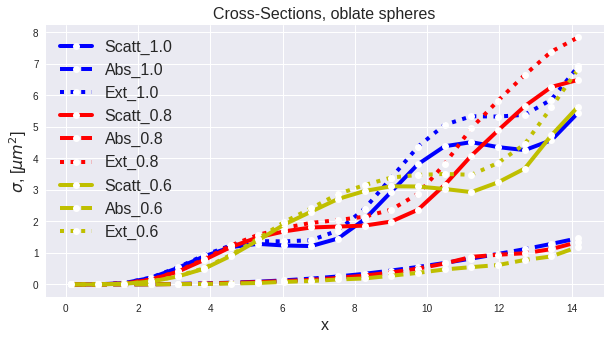

In [11]:
# Plot sigma here

### For instuctor

#sigmas

fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s,'-ob',markerfacecolor='w',lw=4,label='Scatt_1.0')
plt.plot(x,sigma_a,'--ob',markerfacecolor='w',lw=4,label='Abs_1.0')
plt.plot(x,sigma_e,':ob',markerfacecolor='w',lw=4,label='Ext_1.0')

plt.plot(x,sigma_s_8,'-or',markerfacecolor='w',lw=4,label='Scatt_0.8')
plt.plot(x,sigma_a_8,'--or',markerfacecolor='w',lw=4,label='Abs_0.8')
plt.plot(x,sigma_e_8,':or',markerfacecolor='w',lw=4,label='Ext_0.8')

plt.plot(x,sigma_s_6,'-oy',markerfacecolor='w',lw=4,label='Scatt_0.6')
plt.plot(x,sigma_a_6,'--oy',markerfacecolor='w',lw=4,label='Abs_0.6')
plt.plot(x,sigma_e_6,':oy',markerfacecolor='w',lw=4,label='Ext_0.6')

ax = plt.gca()
ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'$\sigma$, [$\mu m^{2}$]',fontsize=16)
ax.set_title('Cross-Sections, oblate spheres',fontsize=16)

plt.show()

### 

### Reminder: How do we calculate Q from $\sigma$?

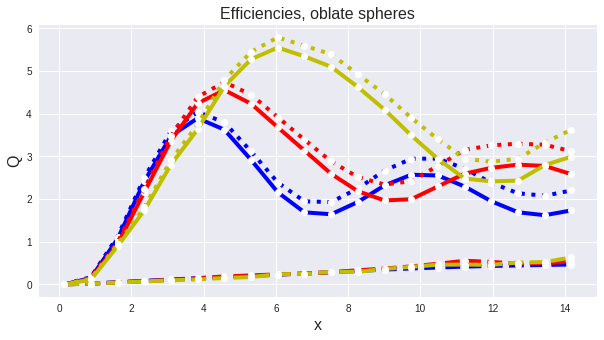

In [12]:
#Plot Q's here

### For instructor

#q's
fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s/(np.pi*r**2),'-ob',markerfacecolor='w',lw=4,label='Scatt_1.0')
plt.plot(x,sigma_a/(np.pi*r**2),'--ob',markerfacecolor='w',lw=4,label='Abs_1.0')
plt.plot(x,sigma_e/(np.pi*r**2),':ob',markerfacecolor='w',lw=4,label='Ext_1.0')


ar_adj = np.pi*r**2*0.8
plt.plot(x,sigma_s_8/ar_adj,'-or',markerfacecolor='w',lw=4,label='Scatt_0.8')
plt.plot(x,sigma_a_8/ar_adj,'--or',markerfacecolor='w',lw=4,label='Abs_0.8')
plt.plot(x,sigma_e_8/ar_adj,':or',markerfacecolor='w',lw=4,label='Ext_0.8')
ar_adj = np.pi*r**2*0.6
plt.plot(x,sigma_s_6/ar_adj,'-oy',markerfacecolor='w',lw=4,label='Scatt_0.6')
plt.plot(x,sigma_a_6/ar_adj,'--oy',markerfacecolor='w',lw=4,label='Abs_0.6')
plt.plot(x,sigma_e_6/ar_adj,':oy',markerfacecolor='w',lw=4,label='Ext_0.6')


ax = plt.gca()
# ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'Q',fontsize=16)
ax.set_title('Efficiencies, oblate spheres',fontsize=16)
plt.show()

###

## Q7b: Discuss the results in terms of what happens as this aerosol becomes more oblate (e.g. rotation axis --> 0.6)

---



Enter text here: Double click me


INSTRUCTOR <br/>
Learing objectives from this figure:

1) For small X, and considering the scatting of the particle, the most efficient scatterer is the sphere, but as the size parameter increases the more oblate particle has more efficient scattering, until large size parameters<br/>
2) Extinction Efficiency is mostly scattering for these particles, with similar (not distinguishable difference between absorption effciency)

# Question 7 cont. : 

---

Now change rotational axis to 1.2 and 1.4. What particle do we have now? (prolate vs oblate)

In [0]:
## Hint: You can copy and paste


### FOR INSTRUCTOR
scat_obs4 = np.zeros(len(r),dtype=object)
scat_obs5 = np.zeros(len(r),dtype=object)
#loop across radii
for i in np.arange(0,len(r)):
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_SPHEROID,axis_ratio=1.0/1.2)
    #We will set the radius as the maximum radius to emulate the sphere
    t.radius_type = t.RADIUS_MAXIMUM
    #store object
    scat_obs4[i] = t
    
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_SPHEROID,axis_ratio=1.0/1.4)
    t.radius_type = t.RADIUS_MAXIMUM
    scat_obs5[i] = t

#Step 4: pre-allocate array to hold scatter cross-sections
sigma_s_12 = np.zeros(len(r))
sigma_a_12 = np.zeros(len(r))
sigma_e_12 = np.zeros(len(r))

sigma_s_14 = np.zeros(len(r))
sigma_a_14 = np.zeros(len(r))
sigma_e_14 = np.zeros(len(r))
#Step 5: loop across radii: The reason for the two loops is so we can just do this second loop later on
for i in np.arange(0,len(r)):
    #to calculate all parameters we will use this syntax
    sigma_s_12[i] = pytmatrix.scatter.sca_xsect(scat_obs4[i])
    sigma_e_12[i] = pytmatrix.scatter.ext_xsect(scat_obs4[i])
    sigma_a_12[i] = sigma_e_12[i] - sigma_s_12[i]
    
    sigma_s_14[i] = pytmatrix.scatter.sca_xsect(scat_obs5[i])
    sigma_e_14[i] = pytmatrix.scatter.ext_xsect(scat_obs5[i])
    sigma_a_14[i] = sigma_e_14[i] - sigma_s_14[i]
    
###

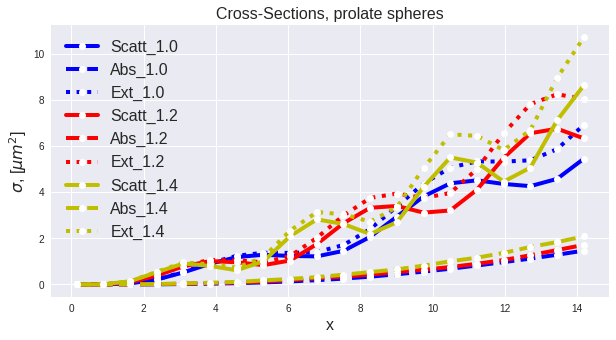

In [14]:
# Plot sigma here

### For instuctor

#sigmas

fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s,'-ob',markerfacecolor='w',lw=4,label='Scatt_1.0')
plt.plot(x,sigma_a,'--ob',markerfacecolor='w',lw=4,label='Abs_1.0')
plt.plot(x,sigma_e,':ob',markerfacecolor='w',lw=4,label='Ext_1.0')

plt.plot(x,sigma_s_12,'-or',markerfacecolor='w',lw=4,label='Scatt_1.2')
plt.plot(x,sigma_a_12,'--or',markerfacecolor='w',lw=4,label='Abs_1.2')
plt.plot(x,sigma_e_12,':or',markerfacecolor='w',lw=4,label='Ext_1.2')

plt.plot(x,sigma_s_14,'-oy',markerfacecolor='w',lw=4,label='Scatt_1.4')
plt.plot(x,sigma_a_14,'--oy',markerfacecolor='w',lw=4,label='Abs_1.4')
plt.plot(x,sigma_e_14,':oy',markerfacecolor='w',lw=4,label='Ext_1.4')

ax = plt.gca()
ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'$\sigma$, [$\mu m^{2}$]',fontsize=16)
ax.set_title('Cross-Sections, prolate spheres',fontsize=16)
plt.show()

### 

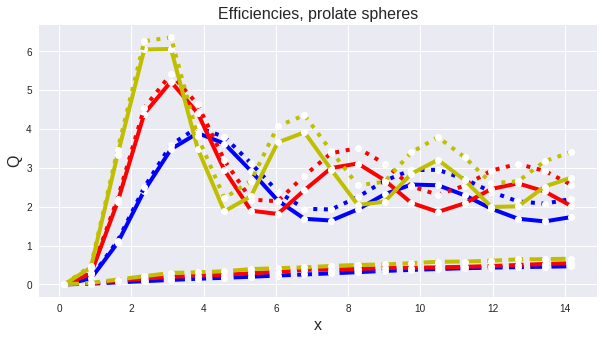

In [15]:
#Plot Q's here

### For instructor


#cross section of prolate is just circle, think of vertical hot dog
#q's
fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s/(np.pi*r**2),'-ob',markerfacecolor='w',lw=4,label='Scatt_1.0')
plt.plot(x,sigma_a/(np.pi*r**2),'--ob',markerfacecolor='w',lw=4,label='Abs_1.0')
plt.plot(x,sigma_e/(np.pi*r**2),':ob',markerfacecolor='w',lw=4,label='Ext_1.0')


ar_adj = np.pi*r**2
plt.plot(x,sigma_s_12/ar_adj,'-or',markerfacecolor='w',lw=4,label='Scatt_1.2')
plt.plot(x,sigma_a_12/ar_adj,'--or',markerfacecolor='w',lw=4,label='Abs_1.2')
plt.plot(x,sigma_e_12/ar_adj,':or',markerfacecolor='w',lw=4,label='Ext_1.2')
ar_adj = np.pi*r**2
plt.plot(x,sigma_s_14/ar_adj,'-oy',markerfacecolor='w',lw=4,label='Scatt_1.4')
plt.plot(x,sigma_a_14/ar_adj,'--oy',markerfacecolor='w',lw=4,label='Abs_1.4')
plt.plot(x,sigma_e_14/ar_adj,':oy',markerfacecolor='w',lw=4,label='Ext_1.4')

ax = plt.gca()
# ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'Q',fontsize=16)
ax.set_title('Efficiencies, prolate spheres',fontsize=16)

plt.show()

###

## Q7c: Discuss prolate spheroids against the sphere

Enter text here: Double click me

# Question 8: Compare a sphere against the cylinder

In [0]:
## Hint: You can copy and paste

### FOR INSTRUCTOR
scat_obs6 = np.zeros(len(r),dtype=object)
#loop across radii
for i in np.arange(0,len(r)):
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_CYLINDER,axis_ratio=1.0)
    #We will set the radius as the maximum radius to emulate the sphere
    t.radius_type = t.RADIUS_MAXIMUM
    #store object
    scat_obs6[i] = t
  
#Step 4: pre-allocate array to hold scatter cross-sections
sigma_s_cyl = np.zeros(len(r))
sigma_a_cyl = np.zeros(len(r))
sigma_e_cyl = np.zeros(len(r))

#Step 5: loop across radii: The reason for the two loops is so we can just do this second loop later on
for i in np.arange(0,len(r)):
    #to calculate all parameters we will use this syntax
    sigma_s_cyl[i] = pytmatrix.scatter.sca_xsect(scat_obs6[i])
    sigma_e_cyl[i] = pytmatrix.scatter.ext_xsect(scat_obs6[i])
    sigma_a_cyl[i] = sigma_e_cyl[i] - sigma_s_cyl[i]
    
###

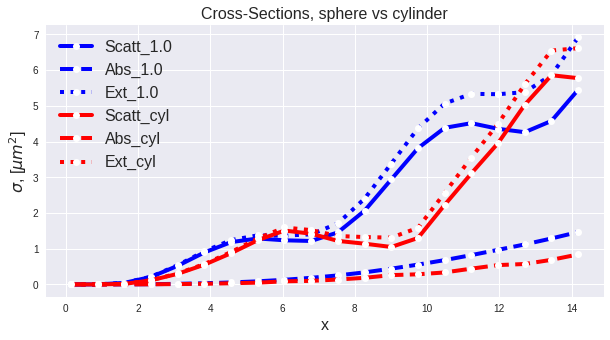

In [17]:
#sigmas

fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s,'-ob',markerfacecolor='w',lw=4,label='Scatt_1.0')
plt.plot(x,sigma_a,'--ob',markerfacecolor='w',lw=4,label='Abs_1.0')
plt.plot(x,sigma_e,':ob',markerfacecolor='w',lw=4,label='Ext_1.0')

plt.plot(x,sigma_s_cyl,'-or',markerfacecolor='w',lw=4,label='Scatt_cyl')
plt.plot(x,sigma_a_cyl,'--or',markerfacecolor='w',lw=4,label='Abs_cyl')
plt.plot(x,sigma_e_cyl,':or',markerfacecolor='w',lw=4,label='Ext_cyl')

ax = plt.gca()
ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'$\sigma$, [$\mu m^{2}$]',fontsize=16)
ax.set_title('Cross-Sections, sphere vs cylinder',fontsize=16)
plt.show()

### 

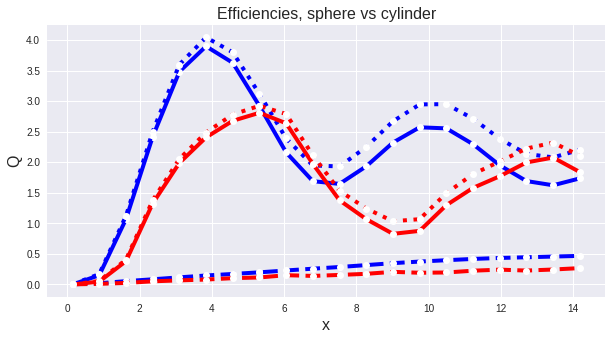

In [18]:
#Plot Q's here

### For instructor


#cross section of prolate is just circle, think of vertical hot dog
#q's
fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s/(np.pi*r**2),'-ob',markerfacecolor='w',lw=4,label='Scatt_1.0')
plt.plot(x,sigma_a/(np.pi*r**2),'--ob',markerfacecolor='w',lw=4,label='Abs_1.0')
plt.plot(x,sigma_e/(np.pi*r**2),':ob',markerfacecolor='w',lw=4,label='Ext_1.0')


ar_adj = np.pi*r**2
plt.plot(x,sigma_s_cyl/ar_adj,'-or',markerfacecolor='w',lw=4,label='Scatt_cyl')
plt.plot(x,sigma_a_cyl/ar_adj,'--or',markerfacecolor='w',lw=4,label='Abs_cyl')
plt.plot(x,sigma_e_cyl/ar_adj,':or',markerfacecolor='w',lw=4,label='Ext_cyl')


ax = plt.gca()
# ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'Q',fontsize=16)
ax.set_title('Efficiencies, sphere vs cylinder',fontsize=16)

plt.show()

###

## Write some obersvations between shapes:

Enter text here: Double click me

# Question 9: Can you explain the relationship between the particle shape and the absorption efficiency? 

INSTUCTOR : The absorption is related to the characterisitics of the particle (i of m). This is also a function of mass. If we assume a constant density for the particle, we can see the the Cylindar and spheroids have less volume and thus less mass when compared to the sphere. Thus the absorbtion is higher for the larger volume sphere. 

# Question 10: Investigate the effect of non-sphericity on single scatter albedo.

---

Specifically: Use the a sphere, spheroid with axis_ratio = 1.0/0.8, cylinder. <br/>

Note: you already have the data needed to calculate this, no need to use the pytmatrix function

Scattering eff to total extinc. eff

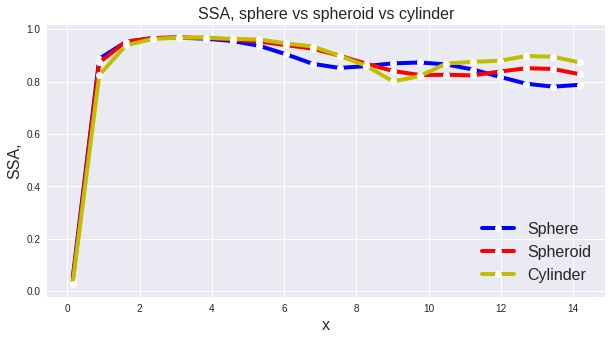

In [19]:
#SSA

fig =plt.figure(figsize=(10,5))

plt.plot(x,sigma_s/sigma_e,'-ob',markerfacecolor='w',lw=4,label='Sphere')
plt.plot(x,sigma_s_8/sigma_e_8,'-or',markerfacecolor='w',lw=4,label='Spheroid')
plt.plot(x,sigma_s_cyl/sigma_e_cyl,'-oy',markerfacecolor='w',lw=4,label='Cylinder')

ax = plt.gca()
ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'SSA,',fontsize=16)
ax.set_title('SSA, sphere vs spheroid vs cylinder',fontsize=16)
plt.show()

### 

## Discuss:

Enter text here: Double click me

# Question 11: Investigate the effect of non-sphericity on the asymetry parameter

---

Specifically: Use the a sphere, spheroid with axis_ratio = 1.0/0.8, cylinder. <br/>

Note: This one you will have to rerun the t-matrix

### Q11a: What does the asymetry parameter tell us? 

Basically, it tells us how much is forward and back scattered. Particles with g > 0 forward scatter more than back scatter. g == 0 iso, g < 0 backscatter more than forward. 

In [0]:
#Step 2: pre-allocate array to hold scatter objects
scat_obs = np.zeros(len(r),dtype=object)
scat_obs2 = np.zeros(len(r),dtype=object)
scat_obs3 = np.zeros(len(r),dtype=object)

#Step 3: loop across radii
for i in np.arange(0,len(r)):
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_SPHEROID,axis_ratio=1)
    t.radius_type = t.RADIUS_MAXIMUM
    scat_obs[i] = t
    

    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_SPHEROID,axis_ratio=1/0.8)
    t.radius_type = t.RADIUS_MAXIMUM
    scat_obs2[i] = t
    
    t =  tmatrix.Scatterer(thet0=0,m=m,wavelength=lambdaa,radius=r[i],shape=tmatrix.Scatterer.SHAPE_CYLINDER,axis_ratio=1)
    t.radius_type = t.RADIUS_MAXIMUM
    scat_obs3[i] = t

#Step 4: pre-allocate array to hold scatter cross-sections
asym_sph = np.zeros(len(r))
asym_spo = np.zeros(len(r))
asym_cyl = np.zeros(len(r))
#Step 5: loop across radii
for i in np.arange(0,len(r)):
    #to calculate all parameters we will use this syntax
    asym_sph[i] = pytmatrix.scatter.asym(scat_obs[i])
    asym_spo[i] = pytmatrix.scatter.asym(scat_obs2[i])
    asym_cyl[i] = pytmatrix.scatter.asym(scat_obs3[i])

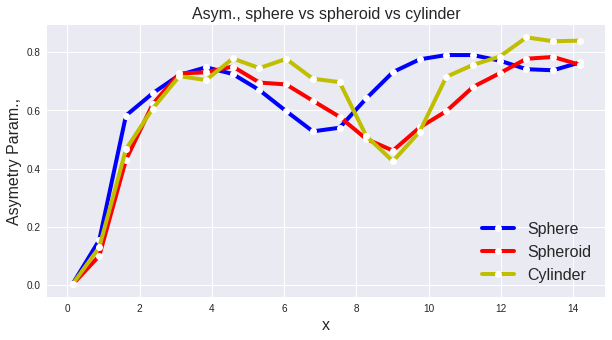

In [21]:
#SSA

fig =plt.figure(figsize=(10,5))

plt.plot(x,asym_sph,'-ob',markerfacecolor='w',lw=4,label='Sphere')
plt.plot(x,asym_spo,'-or',markerfacecolor='w',lw=4,label='Spheroid')
plt.plot(x,asym_cyl,'-oy',markerfacecolor='w',lw=4,label='Cylinder')

ax = plt.gca()
ax.legend(fontsize=16)
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel(r'Asymetry Param.,',fontsize=16)
ax.set_title('Asym., sphere vs spheroid vs cylinder',fontsize=16)
plt.show()

### 

## Discuss:

Enter text here: Double click me

# Concluding remarks:

Looking over all the plots we made today what can we say we have learned?

1) 



# Congrats! 

This concludes Lab 1 of non-spherical scattering. Next class we will look into some databases of cataloged scattering of ice particles.